In [2]:
library(ggplot2)
library(forecast)
library(dplyr)
library(colortools)

monthly_milk <- read.csv("C:\\Users\\HP\\Downloads\\monthly_milk.csv")  # Milk production per cow per month


head(monthly_milk)

month,milk_prod_per_cow_kg
1962-01-01,265.05
1962-02-01,252.45
1962-03-01,288.00
1962-04-01,295.20
1962-05-01,327.15
1962-06-01,313.65


In [3]:
class(monthly_milk$month)

[1] "factor"

In [4]:
# Coerce to `Date` class
monthly_milk$month_date <- as.Date(monthly_milk$month, format = "%Y-%m-%d")

In [6]:
format(monthly_milk$month_date, format = "%Y-%B-%u")
class(format(monthly_milk$month_date, format = "%Y-%B-%u"))  # class is no longer `Date

[1] "1962-January-1"   "1962-February-4"  "1962-March-4"    
  [4] "1962-April-7"     "1962-May-2"       "1962-June-5"     
  [7] "1962-July-7"      "1962-August-3"    "1962-September-6"
 [10] "1962-October-1"   "1962-November-4"  "1962-December-6" 
 [13] "1963-January-2"   "1963-February-5"  "1963-March-5"    
 [16] "1963-April-1"     "1963-May-3"       "1963-June-6"     
 [19] "1963-July-1"      "1963-August-4"    "1963-September-7"
 [22] "1963-October-2"   "1963-November-5"  "1963-December-7" 
 [25] "1964-January-3"   "1964-February-6"  "1964-March-7"    
 [28] "1964-April-3"     "1964-May-5"       "1964-June-1"     
 [31] "1964-July-3"      "1964-August-6"    "1964-September-2"
 [34] "1964-October-4"   "1964-November-7"  "1964-December-2" 
 [37] "1965-January-5"   "1965-February-1"  "1965-March-1"    
 [40] "1965-April-4"     "1965-May-6"       "1965-June-2"     
 [43] "1965-July-4"      "1965-August-7"    "1965-September-3"
 [46] "1965-October-5"   "1965-November-1"  "1965-December-3" 
 [49] "1966-January-6"   "1966-February-2"  "1966-March-2"    
 [52] "1966-April-5"     "1966-May-7"       "1966-June-3"     
 [55] "1966-July-5"      "1966-August-1"    "1966-September-4"
 [58] "1966-October-6"   "1966-November-2"  "1966-December-4" 
 [61] "1967-January-7"   "1967-February-3"  "1967-March-3"    
 [64] "1967-April-6"     "1967-May-1"       "1967-June-4"     
 [67] "1967-July-6"      "1967-August-2"    "1967-September-5"
 [70] "1967-October-7"   "1967-November-3"  "1967-December-5" 
 [73] "1968-January-1"   "1968-February-4"  "1968-March-5"    
 [76] "1968-April-1"     "1968-May-3"       "1968-June-6"     
 [79] "1968-July-1"      "1968-August-4"    "1968-September-7"
 [82] "1968-October-2"   "1968-November-5"  "1968-December-7" 
 [85] "1969-January-3"   "1969-February-6"  "1969-March-6"    
 [88] "1969-April-2"     "1969-May-4"       "1969-June-7"     
 [91] "1969-July-2"      "1969-August-5"    "1969-September-1"
 [94] "1969-October-3"   "1969-November-6"  "1969-December-1" 
 [97] "1970-January-4"   "1970-February-7"  "1970-March-7"    
[100] "1970-April-3"     "1970-May-5"       "1970-June-1"     
[103] "1970-July-3"      "1970-August-6"    "1970-September-2"
[106] "1970-October-4"   "1970-November-7"  "1970-December-2" 
[109] "1971-January-5"   "1971-February-1"  "1971-March-1"    
[112] "1971-April-4"     "1971-May-6"       "1971-June-2"     
[115] "1971-July-4"      "1971-August-7"    "1971-September-3"
[118] "1971-October-5"   "1971-November-1"  "1971-December-3" 
[121] "1972-January-6"   "1972-February-2"  "1972-March-3"    
[124] "1972-April-6"     "1972-May-1"       "1972-June-4"     
[127] "1972-July-6"      "1972-August-2"    "1972-September-5"
[130] "1972-October-7"   "1972-November-3"  "1972-December-5" 
[133] "1973-January-1"   "1973-February-4"  "1973-March-4"    
[136] "1973-April-7"     "1973-May-2"       "1973-June-5"     
[139] "1973-July-7"      "1973-August-3"    "1973-September-6"
[142] "1973-October-1"   "1973-November-4"  "1973-December-6" 
[145] "1974-January-2"   "1974-February-5"  "1974-March-5"    
[148] "1974-April-1"     "1974-May-3"       "1974-June-6"     
[151] "1974-July-1"      "1974-August-4"    "1974-September-7"
[154] "1974-October-2"   "1974-November-5"  "1974-December-7" 
[157] "1975-January-3"   "1975-February-6"  "1975-March-6"    
[160] "1975-April-2"     "1975-May-4"       "1975-June-7"     
[163] "1975-July-2"      "1975-August-5"    "1975-September-1"
[166] "1975-October-3"   "1975-November-6"  "1975-December-1"

[1] "character"

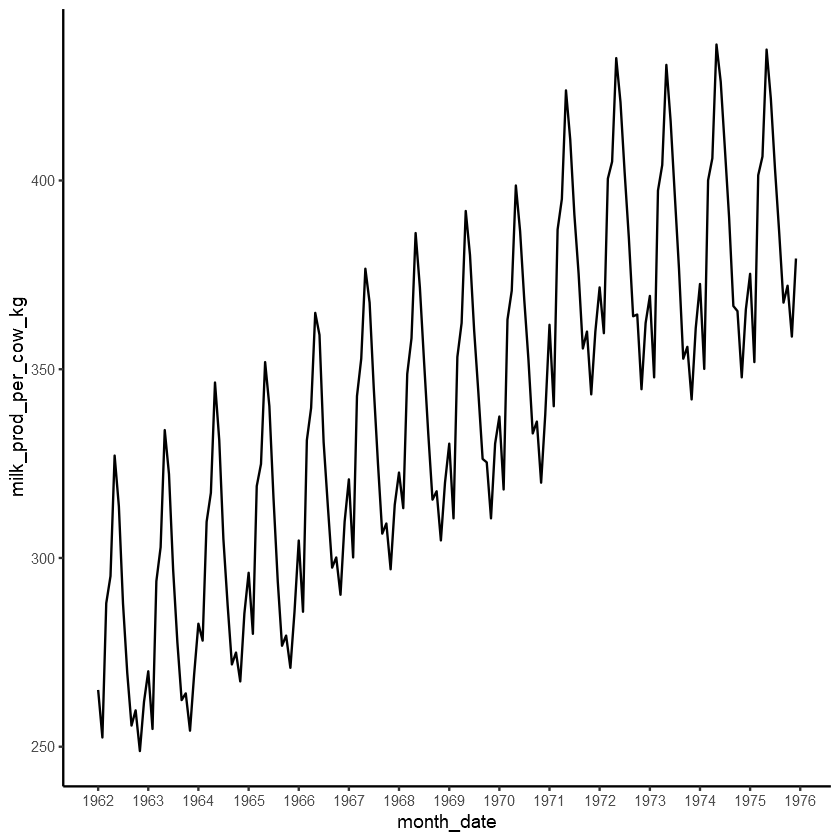

In [7]:
ggplot(monthly_milk, aes(x = month_date, y = milk_prod_per_cow_kg)) +
  geom_line() +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_classic()

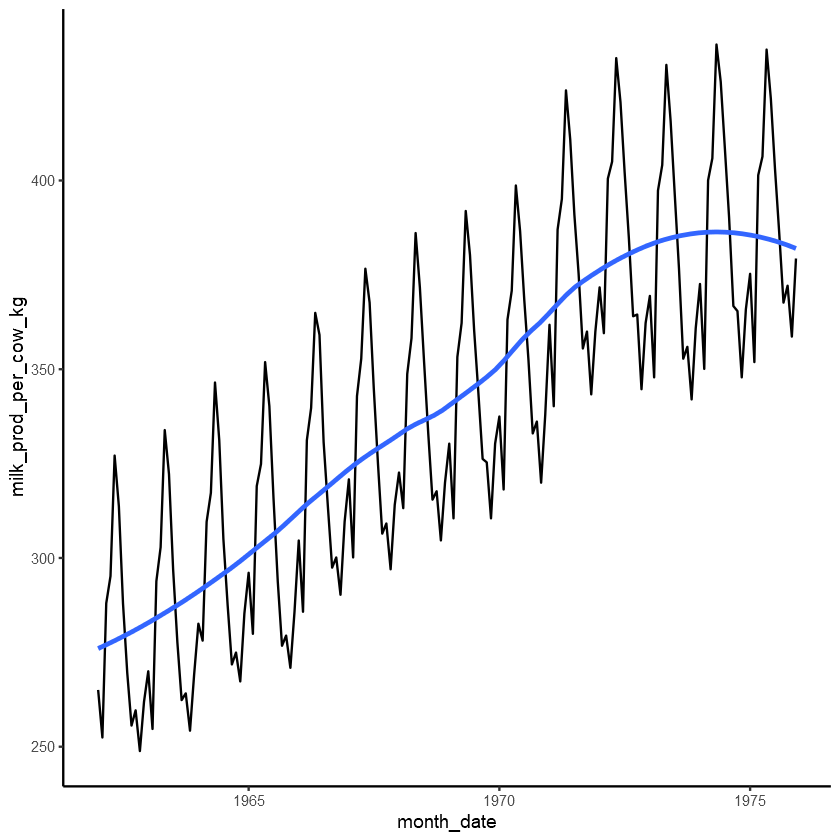

In [8]:
ggplot(monthly_milk, aes(x = month_date, y = milk_prod_per_cow_kg)) +
  geom_line() +
  geom_smooth(method = "loess", se = FALSE, span = 0.6) +
  theme_classic()

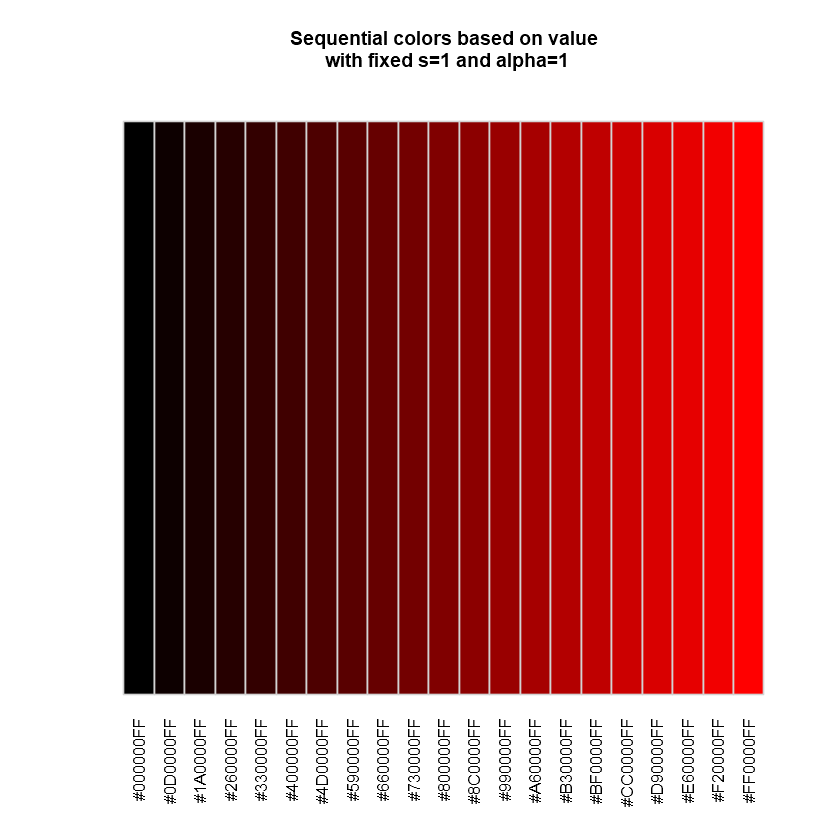

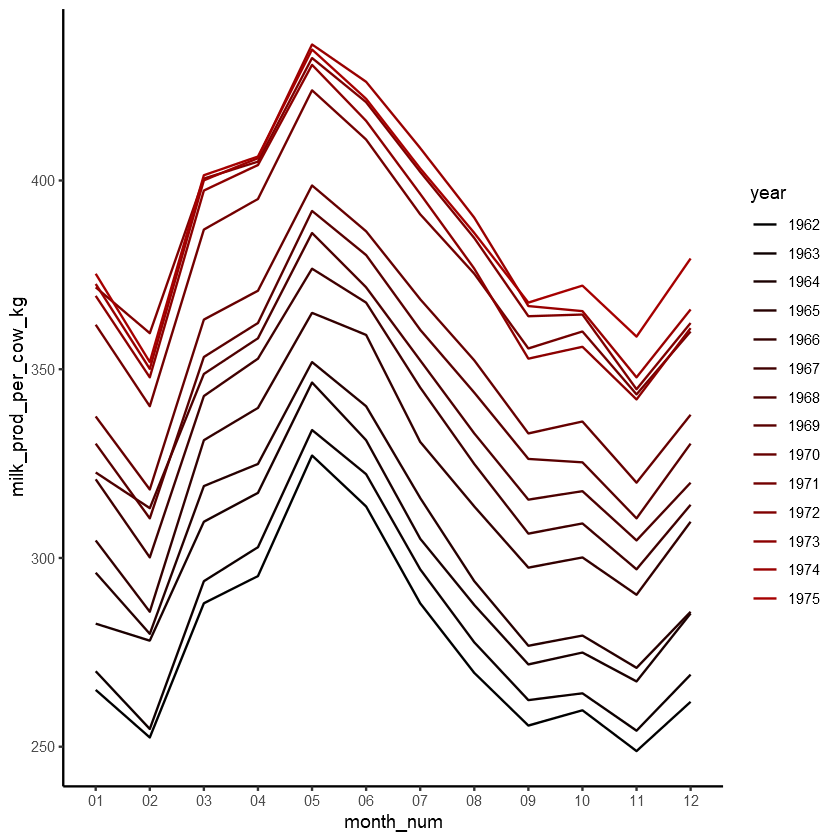

In [9]:
# Extract month and year and store in separate columns
monthly_milk$year <- format(monthly_milk$month_date, format = "%Y")
monthly_milk$month_num <- format(monthly_milk$month_date, format = "%m")

# Create a colour palette using the `colortools` package 
year_pal <- sequential(color = "darkred", percentage = 5, what = "value")

# Make the plot
ggplot(monthly_milk, aes(x = month_num, y = milk_prod_per_cow_kg, group = year)) +
  geom_line(aes(colour = year)) +
  theme_classic() + 
  scale_color_manual(values = year_pal)

In [10]:
# Transform to `ts` class
monthly_milk_ts <- ts(monthly_milk$milk_prod, start = 1962, end = 1975, freq = 12)
# Specify start and end year, measurement frequency (monthly = 12)

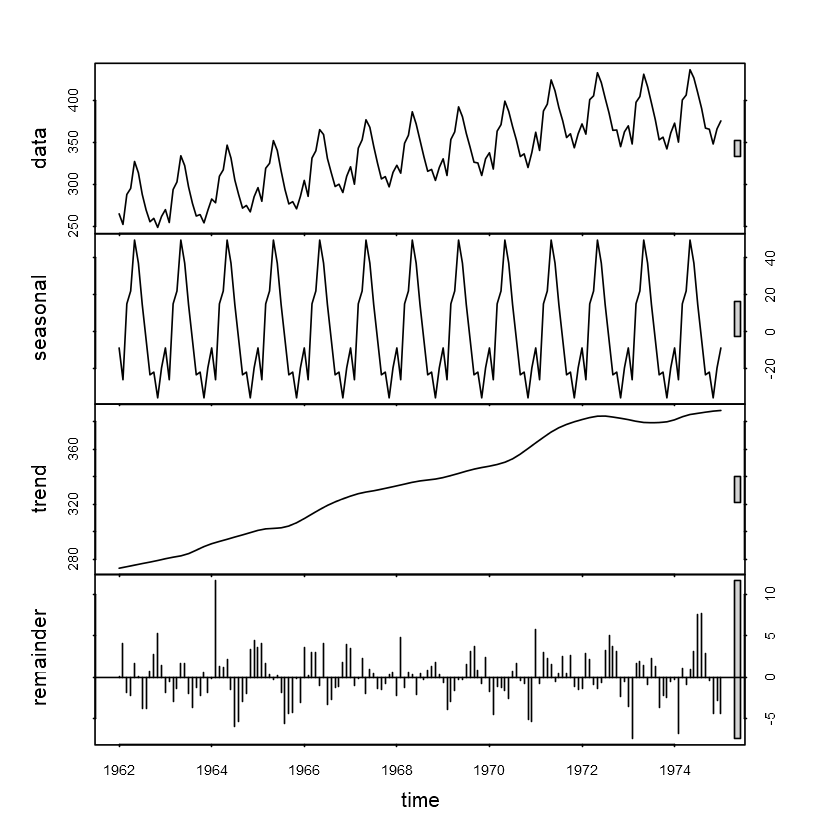

In [13]:
# Decompose using `stl()`
monthly_milk_stl <- stl(monthly_milk_ts, s.window = "period")
plot(monthly_milk_stl) 

In [14]:
monthly_milk_model <- window(x = monthly_milk_ts, start = c(1962), end = c(1970))
monthly_milk_test <- window(x = monthly_milk_ts, start = c(1970))

In [15]:
# Creating model objects of each type of ets model
milk_ets_auto <- ets(monthly_milk_model) # model = "MMM"

In [16]:
#ing forecast objects from the model objects
milk_ets_fc <- forecast(milk_ets_auto, h = 120) 
# `h = 60` means that the forecast will be 60 time periods long, in our case a time period is one month

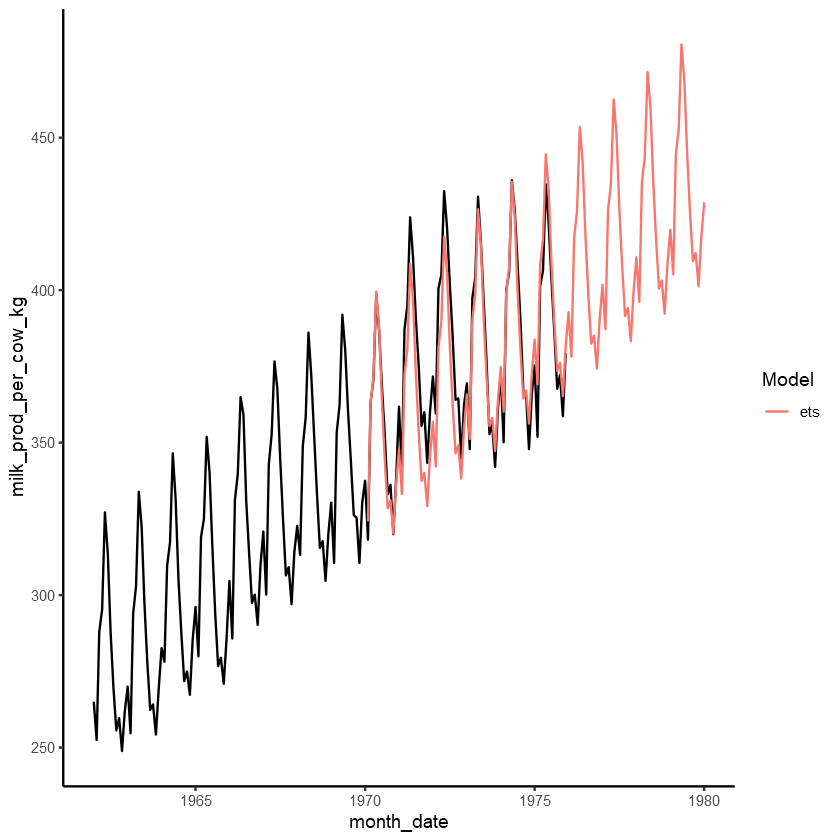

In [17]:
# Convert forecasts to data frames
milk_ets_fc_df <- cbind("Month" = rownames(as.data.frame(milk_ets_fc)), as.data.frame(milk_ets_fc))  # Creating a data frame
names(milk_ets_fc_df) <- gsub(" ", "_", names(milk_ets_fc_df))  # Removing whitespace from column names
milk_ets_fc_df$Date <- as.Date(paste("01-", milk_ets_fc_df$Month, sep = ""), format = "%d-%b %Y")  # prepending day of month to date
milk_ets_fc_df$Model <- rep("ets")  # Adding column of model type



# Combining into one data frame
forecast_all <- rbind(milk_ets_fc_df)

# Plotting with ggplot
ggplot() +
  geom_line(data = monthly_milk, aes(x = month_date, y = milk_prod_per_cow_kg)) +  # Plotting original data
  geom_line(data = forecast_all, aes(x = Date, y = Point_Forecast, colour = Model)) +  # Plotting model forecasts
  theme_classic()

In [18]:
 accuracy(milk_ets_fc, monthly_milk_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01864308,2.726367,2.094068,0.001162836,0.675237,0.2190178,0.006994282,NA
Test set,6.49724181,10.870286,8.643747,1.687599938,2.292374,0.9040464,0.816443289,0.4875223


In [19]:
milk_ets_fc_df %>%
  filter(Month == "Jan 1980") %>%
  select(Month, Point_Forecast)

Month,Point_Forecast
Jan 1980,428.8138


In [20]:
milk_ets_fc_df

,Month,Point_Forecast,Lo_80,Hi_80,Lo_95,Hi_95,Date,Model
Feb 1970,Feb 1970,324.1319,320.3084,327.9555,318.2844,329.9795,1970-02-01,ets
Mar 1970,Mar 1970,363.2257,358.6885,367.7629,356.2867,370.1647,1970-03-01,ets
Apr 1970,Apr 1970,371.6667,366.5136,376.8198,363.7857,379.5477,1970-04-01,ets
May 1970,May 1970,399.5170,393.8139,405.2200,390.7949,408.2390,1970-05-01,ets
Jun 1970,Jun 1970,387.7353,381.5307,393.9399,378.2462,397.2244,1970-06-01,ets
Jul 1970,Jul 1970,363.7951,357.1265,370.4638,353.5963,373.9940,1970-07-01,ets
Aug 1970,Aug 1970,344.3515,337.2488,351.4541,333.4889,355.2140,1970-08-01,ets
Sep 1970,Sep 1970,328.4411,320.9294,335.9528,316.9530,339.9292,1970-09-01,ets
Oct 1970,Oct 1970,331.1034,323.2037,339.0031,319.0219,343.1850,1970-10-01,ets
Nov 1970,Nov 1970,320.2183,311.9486,328.4879,307.5709,332.8656,1970-11-01,ets
